# Instructor Do: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [69]:
# Load original cleaned csv to get the list of columns
df_isbe_financial = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_Financial-CLEAN.csv")
isbe_financial_columns = df_isbe_financial.columns.tolist()
isbe_financial_columns.append('District')
isbe_financial_columns.append('Grades Served')
print (isbe_financial_columns)
df_isbe_financial

['School Name', 'School Type', '# School Enrollment', '$ Total Per-Pupil Expenditures - Subtotal', 'District', 'Grades Served']


,School Name,School Type,# School Enrollment,$ Total Per-Pupil Expenditures - Subtotal
0,Amundsen High School,HIGH SCHOOL,1271.0,12579.96000
1,Bogan High School,HIGH SCHOOL,815.0,13666.18000
2,Carver Military Academy HS,HIGH SCHOOL,475.5,14901.48000
3,Fenger Academy High School,HIGH SCHOOL,203.0,20218.05000
4,Foreman High School,HIGH SCHOOL,736.5,15566.14000
...,...,...,...,...
121,Acero Chtr Sch Network - Major Hector P Garci...,CHARTER SCH,618.5,12434.63627
122,South Shore Intl Col Prep HS,HIGH SCHOOL,646.0,13092.44000
123,Goode STEM Academy HS,HIGH SCHOOL,880.0,12574.39000
124,Chicago Excel Academy HS,HIGH SCHOOL,261.0,15252.32927


In [71]:
# Load the original CSV, so we can re-do the filters in Python
df_isbe_financial = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_Financial.csv")
df_isbe_financial_clean = df_isbe_financial[isbe_financial_columns]
df_isbe_financial_clean.head()

,School Name,School Type,# School Enrollment,$ Total Per-Pupil Expenditures - Subtotal,District,Grades Served
0,Seymour High School,HIGH SCHOOL,238.0,8612.0000,Payson CUSD 1,7 8 9 10 11 12
1,Seymour Elementary School,ELEMENTARY,318.0,7808.0000,Payson CUSD 1,PK K 1 2 3 4 5 6
2,Liberty High School,HIGH SCHOOL,286.5,9664.0000,Liberty CUSD 2,7 8 9 10 11 12
3,Liberty Elementary School,ELEMENTARY,354.0,8431.0000,Liberty CUSD 2,PK K 1 2 3 4 5 6
4,Central High School,HIGH SCHOOL,239.5,11326.3627,Central CUSD 3,9 10 11 12


In [88]:
# Filter on schools in Chicago that serve grades 9 - 12:
df_isbe_financial_clean = df_isbe_financial_clean[df_isbe_financial_clean['District'] == 'City of Chicago SD 299']
df_isbe_financial_clean = df_isbe_financial_clean.dropna(subset=['Grades Served'])
df_isbe_financial_clean = df_isbe_financial_clean[df_isbe_financial_clean['Grades Served'].str.contains('9 10 11 12')]
df_isbe_financial_clean
df_isbe_financial_clean.to_csv("data/ISBE-2019-Report-Card-Public-Data-Set_Financial-CLEAN2.csv")
# Now that we've cleaned the data, drop the soon-to-be-duplicate columns
df_isbe_financial_clean.drop(axis=1, columns=['School Type', 'District', 'Grades Served'], inplace=True)
df_isbe_financial_clean

,School Name,# School Enrollment,$ Total Per-Pupil Expenditures - Subtotal
1128,Amundsen High School,1271.0,12579.960000
1129,Bogan High School,815.0,13666.180000
1130,Carver Military Academy HS,475.5,14901.480000
1131,Farragut Career Academy HS,642.0,16396.410000
1132,Fenger Academy High School,203.0,20218.050000
...,...,...,...
1426,Chicago Virtual Charter School,648.5,8457.565682
1473,Catalyst Charter - Maria ES,1081.0,14608.436570
1534,Horizon Sci Academy - Southwest Charter,736.5,11792.551170
1583,CICS - Longwood Campus,1281.5,13548.611840


In [90]:
# Pull in original cleaned CSV so we can get the column headers
df_isbe_general = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_General-CLEAN.csv")
general_columns = df_isbe_general.columns.to_list()
general_columns.append('District')
general_columns.append('Grades Served')
len(general_columns)
print(general_columns)

['School Name', 'School Type', '# Student Enrollment', '% Student Enrollment - White', '% Student Enrollment - Black or African American', '% Student Enrollment - Hispanic or Latino', '% Student Enrollment - Asian', '% Student Enrollment - Native Hawaiian or Other Pacific Islander', '% Student Enrollment - American Indian or Alaska Native', '% Student Enrollment - Two or More Races', '% Student Enrollment - Children with Disabilities', '% Student Enrollment - EL', '% Student Enrollment - Low Income', '% Student Enrollment - Homeless', 'Total Number of School Days', 'Student Attendance Rate', 'Chronically Truant Students', 'Student Chronic Truancy Rate', 'High School Dropout Rate - Total', 'High School 4-Year Graduation Rate - Total', 'High School 5-Year Graduation Rate - Total', 'Avg Class Size - High School', 'Teacher Retention Rate', '# 9th Grade on Track', '% Graduates enrolled in a Postsecondary Institution within 12 months', '# Graduates enrolled in Community College', 'Chronic Ab

In [91]:
# Pull in the original CSV so we can re-filter in python:
df_isbe_general = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_General.csv")
df_isbe_general_clean = df_isbe_general[general_columns]
df_isbe_general_clean.head()

/var/folders/jd/f52yh_4n4md3vqk92c4p3s3w0000gn/T/ipykernel_28954/649064296.py:2: DtypeWarning: Columns (2,8,9,10,11,12,773,774,787,788,801,802,815,816,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,843,844,845,846,847,848,849,850) have mixed types. Specify dtype option on import or set low_memory=False.
  df_isbe_general = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_General.csv")


,School Name,School Type,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,...,% CRDC Out-of-School Suspensions,% CRDC Expulsions,% CRDC School Related Arrests,% CRDC Referral to Law Enforcement,% CRDC Chronic Absenteeism,% CRDC Incidents of Violence,% CRDC Enrolled PreK,% CRDC Advanced Placement Coursework,District,Grades Served
0,Seymour High School,HIGH SCHOOL,239,95.4,NaN,0.4,0.8,NaN,NaN,3.3,...,0.9,0.0,0.0,0.0,9.3,0.0,0.0,0.0,Payson CUSD 1,7 8 9 10 11 12
1,Seymour Elementary School,ELEMENTARY,316,94.6,0.3,NaN,0.3,NaN,NaN,4.7,...,0.6,0.0,0.0,0.0,6.9,5.7,10.5,0.0,Payson CUSD 1,PK K 1 2 3 4 5 6
2,Liberty High School,HIGH SCHOOL,288,97.6,0.3,NaN,NaN,NaN,NaN,2.1,...,1.7,0.0,0.0,0.0,5.5,0.0,0.0,0.0,Liberty CUSD 2,7 8 9 10 11 12
3,Liberty Elementary School,ELEMENTARY,350,97.4,0.3,NaN,NaN,NaN,NaN,2.3,...,0.6,0.0,0.0,0.0,2.2,0.0,12.4,0.0,Liberty CUSD 2,PK K 1 2 3 4 5 6
4,Central High School,HIGH SCHOOL,237,98.3,NaN,NaN,NaN,NaN,NaN,1.7,...,0.8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,Central CUSD 3,9 10 11 12


In [92]:
# Filter on schools in Chicago that serve grades 9 - 12:
df_isbe_general_clean = df_isbe_general_clean[df_isbe_general_clean['District'] == 'City of Chicago SD 299']
df_isbe_general_clean = df_isbe_general_clean.dropna(subset=['Grades Served'])
df_isbe_general_clean = df_isbe_general_clean[df_isbe_general_clean['Grades Served'].str.contains('9 10 11 12')]
# df_isbe_general_clean
df_isbe_general_clean.to_csv("data/ISBE-2019-Report-Card-Public-Data-Set_General-CLEAN2.csv")
# Drop Unneeded columns:
df_isbe_general_clean.drop(axis=1, columns=['District', 'Grades Served'], inplace=True)
df_isbe_general_clean

,School Name,School Type,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,...,# CRDC Total Enrollment,% CRDC In-School Suspensions,% CRDC Out-of-School Suspensions,% CRDC Expulsions,% CRDC School Related Arrests,% CRDC Referral to Law Enforcement,% CRDC Chronic Absenteeism,% CRDC Incidents of Violence,% CRDC Enrolled PreK,% CRDC Advanced Placement Coursework
1128,Amundsen High School,HIGH SCHOOL,1289,16.1,11.2,58.7,11.4,0.5,0.3,1.7,...,1142.0,8.6,5.0,0.0,1.0,4.4,43.1,0.7,0.0,4.8
1129,Bogan High School,HIGH SCHOOL,828,0.5,60.7,38.4,NaN,0.1,0.1,0.1,...,861.0,26.8,8.7,0.2,0.5,0.2,53.4,1.6,0.0,24.5
1130,Carver Military Academy HS,HIGH SCHOOL,481,1.2,35.6,63.0,NaN,NaN,NaN,0.2,...,491.0,5.1,5.3,0.0,2.0,2.6,32.6,0.8,0.0,13.8
1131,Farragut Career Academy HS,HIGH SCHOOL,651,0.8,12.9,86.2,NaN,NaN,0.2,NaN,...,914.0,0.4,11.4,0.0,0.2,2.0,58.1,1.6,3.6,1.4
1132,Fenger Academy High School,HIGH SCHOOL,203,NaN,96.6,2.0,NaN,0.5,NaN,1.0,...,275.0,44.7,25.8,0.0,1.5,2.9,85.1,6.9,0.0,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,Chicago Virtual Charter School,CHARTER SCH,673,11.9,58.2,20.1,6.8,0.3,0.1,2.5,...,684.0,0.0,0.6,0.0,0.0,0.0,23.2,0.1,0.0,1.2
1473,Catalyst Charter - Maria ES,CHARTER SCH,1095,1.6,44.0,53.6,0.2,0.1,NaN,0.5,...,1100.0,0.4,15.5,1.1,0.0,0.0,8.4,0.3,0.0,9.2
1534,Horizon Sci Academy - Southwest Charter,CHARTER SCH,734,0.4,29.7,68.4,NaN,NaN,0.1,1.4,...,567.0,0.0,0.4,0.0,0.0,0.0,1.4,0.0,0.0,0.0
1583,CICS - Longwood Campus,CHARTER SCH,1283,NaN,99.4,0.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
# Get the "Clean" columns
df_isbe_sat = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_SAT-CLEAN.csv")
isbe_sat_columns = df_isbe_sat.columns.tolist()
# Add back the columns we need for filtering
isbe_sat_columns.append('District')
isbe_sat_columns.append('Grades Served')
print (isbe_sat_columns)
df_isbe_sat
df_isbe_sat.columns
df_isbe_sat.drop(axis=1, columns='School Type', inplace=True)
df_isbe_sat.head()

['School Name', 'School Type', 'SAT Reading Average', 'SAT Math Average', 'District', 'Grades Served']


,School Name,SAT Reading Average,SAT Math Average
0,Acero Chtr Sch Network - Major Hector P Garci...,449.3,450.3
1,Acero Chtr Sch Network Victoria Soto Campus,424.9,426.1
2,Air Force Acad High School,443.4,434.2
3,Alcott Humanities High School,470.8,461.3
4,Amundsen High School,481.3,489.8


In [75]:
# Read back in the original csv
df_isbe_sat = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_SAT.csv")
# Set the columns to only the ones we want
df_isbe_sat_clean = df_isbe_sat[isbe_sat_columns]
df_isbe_sat_clean.head()

/var/folders/jd/f52yh_4n4md3vqk92c4p3s3w0000gn/T/ipykernel_28954/1613122028.py:2: DtypeWarning: Columns (2,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_isbe_sat = pd.read_csv("data/ISBE-2019-Report-Card-Public-Data-Set_SAT.csv")


,School Name,School Type,SAT Reading Average,SAT Math Average,District,Grades Served
0,North Mac Elementary,ELEMENTARY,NaN,NaN,North Mac CUSD 34,PK K 1 2
1,Liberty Intermediate School,ELEMENTARY,NaN,NaN,Bourbonnais SD 53,5 6
2,Bright Futures Pre-K Prog,PreK,NaN,NaN,Galesburg CUSD 205,PK
3,H R McCall Elem School,ELEMENTARY,NaN,NaN,Waukegan CUSD 60,PK K 1 2 3 4 5
4,Wilson Elem School,ELEMENTARY,NaN,NaN,Chicago Heights SD 170,K 1 2 3 4 5 6 7 8


In [86]:
# Filter based on our criteria
df_isbe_sat_clean = df_isbe_sat_clean[df_isbe_sat_clean['District'] == 'City of Chicago SD 299']
df_isbe_sat_clean = df_isbe_sat_clean.dropna(subset=['Grades Served'])
df_isbe_sat_clean = df_isbe_sat_clean[df_isbe_sat_clean['Grades Served'].str.contains('9 10 11 12')]
df_isbe_sat_clean.to_csv("data/ISBE-2019-Report-Card-Public-Data-Set_SAT-CLEAN2.csv")
# Now that we've cleaned the data, drop the soon-to-be-duplicate columns
df_isbe_sat_clean.drop(axis=1, columns=['School Type', 'District', 'Grades Served'], inplace=True)
df_isbe_sat_clean

,School Name,SAT Reading Average,SAT Math Average
9,Alcott Humanities High School,470.8,461.3
57,Perspectives Chtr - IIT Campus,428.0,410.4
83,Disney II Magnet HS,524.4,481.1
95,Harlan Community Academy HS,400.3,380.0
103,Noble St Chtr-Hansberry College Prep - Silver,466.8,459.7
...,...,...,...
3735,YCCS-Latino Youth Alternative HS,400.1,388.1
3747,Lincoln Park High School,532.3,540.4
3806,Hyde Park Academy High School,413.2,397.4
3808,Perspectives Chtr - Leadership Acad,411.2,396.9


In [95]:
# Merge dataframes
df_isbe_merged = df_isbe_financial_clean.merge(df_isbe_sat_clean, on='School Name')
df_isbe_merged.head()

,School Name,# School Enrollment,$ Total Per-Pupil Expenditures - Subtotal,SAT Reading Average,SAT Math Average
0,Amundsen High School,1271.0,12579.96,481.3,489.8
1,Bogan High School,815.0,13666.18,406.1,400.3
2,Carver Military Academy HS,475.5,14901.48,459.0,469.2
3,Farragut Career Academy HS,642.0,16396.41,413.2,414.3
4,Fenger Academy High School,203.0,20218.05,392.2,372.1


In [98]:
# Merge dataframes
df_isbe_merged = df_isbe_general_clean.merge(df_isbe_sat_clean, on='School Name')
pd.options.display.max_columns = 500
df_isbe_merged

,School Name,School Type,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Chronically Truant Students,Student Chronic Truancy Rate,High School Dropout Rate - Total,High School 4-Year Graduation Rate - Total,High School 5-Year Graduation Rate - Total,Avg Class Size - High School,Teacher Retention Rate,# 9th Grade on Track,% Graduates enrolled in a Postsecondary Institution within 12 months,# Graduates enrolled in Community College,Chronic Absenteeism,Five Essential Survey Effective Leaders,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment,Five Essential Survey Supportive Environment Level,Five Essential Survey Ambitious Instruction,Five Essential Survey Ambitious Instruction.1,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,# CRDC Total Enrollment,% CRDC In-School Suspensions,% CRDC Out-of-School Suspensions,% CRDC Expulsions,% CRDC School Related Arrests,% CRDC Referral to Law Enforcement,% CRDC Chronic Absenteeism,% CRDC Incidents of Violence,% CRDC Enrolled PreK,% CRDC Advanced Placement Coursework,SAT Reading Average,SAT Math Average
0,Amundsen High School,HIGH SCHOOL,1289,16.1,11.2,58.7,11.4,0.5,0.3,1.7,21.5,10.1,75.3,0.9,178.0,91.3,475.0,40.6,3.4,85.8,84.6,27.4,92.5,317.0,70.1,80.0,32.4,63.0,4.0,79.0,4.0,88.0,5.0,68.0,4.0,80.0,5.0,90.1,82.3,1142.0,8.6,5.0,0.0,1.0,4.4,43.1,0.7,0.0,4.8,481.3,489.8
1,Bogan High School,HIGH SCHOOL,828,0.5,60.7,38.4,NaN,0.1,0.1,0.1,25.4,12.3,90.0,3.9,178.0,83.1,945.0,94.7,13.9,56.2,60.1,30.1,80.0,172.0,56.2,66.0,78.9,43.0,3.0,52.0,3.0,54.0,3.0,44.0,3.0,61.0,4.0,92.6,88.3,861.0,26.8,8.7,0.2,0.5,0.2,53.4,1.6,0.0,24.5,406.1,400.3
2,Carver Military Academy HS,HIGH SCHOOL,481,1.2,35.6,63.0,NaN,NaN,NaN,0.2,10.6,5.4,85.0,3.5,178.0,93.3,202.0,46.2,1.3,94.0,97.4,26.1,89.5,90.0,64.8,23.0,23.3,65.0,4.0,69.0,4.0,70.0,4.0,47.0,3.0,59.0,3.0,79.6,93.8,491.0,5.1,5.3,0.0,2.0,2.6,32.6,0.8,0.0,13.8,459.0,469.2
3,Farragut Career Academy HS,HIGH SCHOOL,651,0.8,12.9,86.2,NaN,NaN,0.2,NaN,24.9,28.4,97.4,1.7,178.0,85.4,422.0,62.1,12.9,57.0,57.2,26.8,82.9,105.0,46.3,42.0,62.9,55.0,3.0,66.0,4.0,53.0,3.0,60.0,4.0,69.0,4.0,82.7,85.1,914.0,0.4,11.4,0.0,0.2,2.0,58.1,1.6,3.6,1.4,413.2,414.3
4,Fenger Academy High School,HIGH SCHOOL,203,NaN,96.6,2.0,NaN,0.5,NaN,1.0,21.2,0.5,92.6,53.2,178.0,83.2,240.0,83.7,21.6,35.2,44.7,30.2,83.3,39.0,33.3,8.0,79.1,78.0,4.0,84.0,5.0,63.0,4.0,75.0,4.0,99.0,5.0,93.5,99.9,275.0,44.7,25.8,0.0,1.5,2.9,85.1,6.9,0.0,6.9,392.2,372.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Chicago Virtual Charter School,CHARTER SCH,673,11.9,58.2,20.1,6.8,0.3,0.1,2.5,14.6,7.7,64.2,2.2,178.0,86.5,341.0,62.5,8.1,45.5,56.3,31.9,51.6,26.0,55.6,NaN,48.1,38.0,2.0,33.0,2.0,59.0,3.0,60.0,4.0,45.0,3.0,57.6,82.3,684.0,0.0,0.6,0.0,0.0,0.0,23.2,0.1,0.0,1.2,474.2,453.3
146,Catalyst Charter - Maria ES,CHARTER SCH,1095,1.6,44.0,53.6,0.2,0.1,NaN,0.5,19.1,19.7,92.8,5.1,178.0,95.4,211.0,22.2,1.1,92.7,95.6,18.5,9.4,145.0,67.2,NaN,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1100.0,0.4,15.5,1.1,0.0,0.0,8.4,0.3,0.0,9.2,444.7,435.1
147,Horizon Sci Academy - Southwest Charter,CHARTER SCH,734,0.4,29.7,68.4,NaN,NaN,0.1,1.4,18.7,24.7,95.4,0.8,178.0,94.2

In [101]:
df_school_profile = pd.read_csv("data/School_Profile-SY1819-CLEAN.csv")
df_school_profile.columns
pd.options.display.max_columns = 1000

# df_school_profile.drop(axis=1, columns='School Type', inplace=True)
df_school_profile

,School_ID,ISBE_Name,Short_Name,Long_Name,Primary_Category,Zip,Attendance_Boundaries,Student_Count_Total,Student_Count_Low_Income,Low_Income_Pct,Student_Count_Special_Ed,Special_Ed_Pct,Student_Count_English_Learners,English_Learners_Pct,Student_Count_Black,Black_Student_Pct,Student_Count_Hispanic,Hispanic_Student_Pct,Student_Count_White,White_Student_Pct,Student_Count_Asian,Asian_Student_Pct,Student_Count_Native_American,Native_American_Student_Pct,Student_Count_Asian_Pacific_Islander,Asian_Pacific_Islander_Student_Pct,Student_Count_Multi,Multi_Student_Pct,Student_Count_Hawaiian_Pacific_Islander,Hawaiian_Pacific_Islander_Student_Pct,Student_Count_Ethnicity_Not_Available,Ethnicity_Not_Available_Pct,Bilingual_Services,Refugee_Services,Title_1_Eligible,College_Enrollment_Rate_School,Graduation_Rate_School,Overall_Rating,Rating_Status,Network
0,400085,Acero Chtr Sch Network - Major Hector P Garci...,ACERO - GARCIA HS,Acero Charter Schools - Major Hector P. Garcia MD,HS,60632,0,612,561,91.666667,108,17.647059,180,29.411765,11,1.797386,591,96.568627,8,1.307190,1,0.163399,1,0.163399,0,0.0,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,1.0,64.2,87.3,Level 1,NOT APPLICABLE,Charter
1,400149,Acero Chtr Sch Network Victoria Soto Campus,ACERO - SOTO HS,Acero Charter Schools - Victoria Soto,HS,60632,0,515,475,92.233010,87,16.893204,171,33.203884,9,1.747573,505,98.058252,1,0.194175,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,1.0,72.3,71.4,Level 2+,NOT APPLICABLE,Charter
2,610513,Air Force Acad High School,AIR FORCE HS,Air Force Academy High School,HS,60609,0,194,161,82.989691,21,10.824742,15,7.731959,89,45.876289,88,45.360825,12,6.185567,1,0.515464,1,0.515464,0,0.0,3,1.546392,0,0.000000,0,0.000000,0.0,0.0,1.0,62.5,83.7,Level 2+,GOOD STANDING,Network 16
3,610524,Alcott Humanities High School,ALCOTT HS,Louisa May Alcott College Preparatory HS,HS,60618,0,316,243,76.898734,67,21.202532,26,8.227848,56,17.721519,209,66.139241,33,10.443038,8,2.531646,2,0.632911,0,0.0,5,1.582278,3,0.949367,0,0.000000,1.0,0.0,1.0,76.2,92.1,Level 1,GOOD STANDING,NaN
4,609695,Amundsen High School,AMUNDSEN HS,Roald Amundsen High School,HS,60625,1,1370,946,69.051095,213,15.547445,122,8.905109,139,10.145985,758,55.328467,294,21.459854,131,9.562044,7,0.510949,0,0.0,36,2.627737,5,0.364964,0,0.000000,1.0,1.0,1.0,76.6,83.1,Level 1+,GOOD STANDING,ISP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,400143,YCCS-West Town Academy Alt HS,YCCS - WEST TOWN,YCCS-West Town Acad Alternative HS,HS,60612,0,117,109,93.162393,24,20.512821,8,6.837607,71,60.683761,40,34.188034,0,0.000000,0,0.000000,2,1.709402,0,0.0,0,0.000000,0,0.000000,4,3.418803,1.0,NaN,1.0,18.0,NaN,Level 1,NOT APPLICABLE,Options
170,400145,YCCS-Youth Connection Leadership Academy,YCCS - YOUTH CONNECTION,YCCS-Youth Connection Leadership Acad HS,HS,60616,0,110,107,97.272727,29,26.363636,0,0.000000,103,93.636364,4,3.636364,3,2.727273,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,0.0,NaN,1.0,16.8,NaN,Level 1,NOT APPLICABLE,Options
171,400130,YCCS-Community Youth Dev Inst HS,YCCS - YOUTH DEVELOPMENT,YCCS-Community Youth Development Institute HS,HS,60620,0,95,93,97.894737,30,31.578947,0,0.000000,93,97.894737,0,0.000000,0,0.000000,0,0.000000,1,1.052632,0,0.0,1,1.052632,0,0.000000,0,0.000000,0.0,NaN,1.0,22.4,NaN,Level 1,NOT APPLICABLE,Options
172,609748,NaN,YORK HS,Consuella B York Alternative HS,HS,60608,0,139,138,99.280576,53,38.129496,6,4.316547,106,76.258993,26,18.705036,3,2.158273,0,0.000000,2,1.438849,0,0.0,2,1.438849,0,0.000000,0,0.000000,NaN,NaN,1.0,4.0,1.6,Inability to Rate,GOOD STANDING,Network 16


In [105]:
# Merge dataframes
df_merged = df_school_profile.merge(df_isbe_merged, left_on='ISBE_Name', right_on='School Name')
df_merged_columns = df_merged.columns.to_list()
print (df_merged_columns)
df_merged

['School_ID', 'ISBE_Name', 'Short_Name', 'Long_Name', 'Primary_Category', 'Zip', 'Attendance_Boundaries', 'Student_Count_Total', 'Student_Count_Low_Income', 'Low_Income_Pct', 'Student_Count_Special_Ed', 'Special_Ed_Pct', 'Student_Count_English_Learners', 'English_Learners_Pct', 'Student_Count_Black', 'Black_Student_Pct', 'Student_Count_Hispanic', 'Hispanic_Student_Pct', 'Student_Count_White', 'White_Student_Pct', 'Student_Count_Asian', 'Asian_Student_Pct', 'Student_Count_Native_American', 'Native_American_Student_Pct', 'Student_Count_Asian_Pacific_Islander', 'Asian_Pacific_Islander_Student_Pct', 'Student_Count_Multi', 'Multi_Student_Pct', 'Student_Count_Hawaiian_Pacific_Islander', 'Hawaiian_Pacific_Islander_Student_Pct', 'Student_Count_Ethnicity_Not_Available', 'Ethnicity_Not_Available_Pct', 'Bilingual_Services', 'Refugee_Services', 'Title_1_Eligible', 'College_Enrollment_Rate_School', 'Graduation_Rate_School', 'Overall_Rating', 'Rating_Status', 'Network', 'School Name', 'School Type',

,School_ID,ISBE_Name,Short_Name,Long_Name,Primary_Category,Zip,Attendance_Boundaries,Student_Count_Total,Student_Count_Low_Income,Low_Income_Pct,Student_Count_Special_Ed,Special_Ed_Pct,Student_Count_English_Learners,English_Learners_Pct,Student_Count_Black,Black_Student_Pct,Student_Count_Hispanic,Hispanic_Student_Pct,Student_Count_White,White_Student_Pct,Student_Count_Asian,Asian_Student_Pct,Student_Count_Native_American,Native_American_Student_Pct,Student_Count_Asian_Pacific_Islander,Asian_Pacific_Islander_Student_Pct,Student_Count_Multi,Multi_Student_Pct,Student_Count_Hawaiian_Pacific_Islander,Hawaiian_Pacific_Islander_Student_Pct,Student_Count_Ethnicity_Not_Available,Ethnicity_Not_Available_Pct,Bilingual_Services,Refugee_Services,Title_1_Eligible,College_Enrollment_Rate_School,Graduation_Rate_School,Overall_Rating,Rating_Status,Network,School Name,School Type,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Chronically Truant Students,Student Chronic Truancy Rate,High School Dropout Rate - Total,High School 4-Year Graduation Rate - Total,High School 5-Year Graduation Rate - Total,Avg Class Size - High School,Teacher Retention Rate,# 9th Grade on Track,% Graduates enrolled in a Postsecondary Institution within 12 months,# Graduates enrolled in Community College,Chronic Absenteeism,Five Essential Survey Effective Leaders,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment,Five Essential Survey Supportive Environment Level,Five Essential Survey Ambitious Instruction,Five Essential Survey Ambitious Instruction.1,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,# CRDC Total Enrollment,% CRDC In-School Suspensions,% CRDC Out-of-School Suspensions,% CRDC Expulsions,% CRDC School Related Arrests,% CRDC Referral to Law Enforcement,% CRDC Chronic Absenteeism,% CRDC Incidents of Violence,% CRDC Enrolled PreK,% CRDC Advanced Placement Coursework,SAT Reading Average,SAT Math Average
0,400085,Acero Chtr Sch Network - Major Hector P Garci...,ACERO - GARCIA HS,Acero Charter Schools - Major Hector P. Garcia MD,HS,60632,0,612,561,91.666667,108,17.647059,180,29.411765,11,1.797386,591,96.568627,8,1.307190,1,0.163399,1,0.163399,0,0.0,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,1.0,64.2,87.3,Level 1,NOT APPLICABLE,Charter,Acero Chtr Sch Network - Major Hector P Garci...,CHARTER SCH,618,1.8,1.0,96.6,0.3,NaN,0.3,NaN,19.9,26.1,93.4,1.1,178.0,90.7,240.0,41.7,1.1,92.1,97.4,25.4,95.3,141.0,NaN,NaN,36.0,36.0,2.0,44.0,3.0,49.0,3.0,56.0,3.0,61.0,4.0,53.9,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.3,450.3
1,400149,Acero Chtr Sch Network Victoria Soto Campus,ACERO - SOTO HS,Acero Charter Schools - Victoria Soto,HS,60632,0,515,475,92.233010,87,16.893204,171,33.203884,9,1.747573,505,98.058252,1,0.194175,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,1.0,72.3,71.4,Level 2+,NOT APPLICABLE,Charter,Acero Chtr Sch Network Victoria Soto Campus,CHARTER SCH,541,0.2,1.5,98.3,NaN,NaN,NaN,NaN,15.7,32.7,89.6,0.6,178.0,88.4,285.0,57.6,4.0,87.6,85.9,26.4,77.1,106.0,NaN,NaN,46.6,42.0,3.0,59.0,3.0,78.0,4.0,63.0,4.0,66.0,4.0,88.0,92.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.9,426.1
2,610513,Air Force Acad High School,AIR FORCE HS,Air Force Academy High School,HS,60609,0,194,161,82.989691,21,10.824742,15,7.731959,89,45.876289,88,45.36

In [107]:
# Convert 9-th grade on track to a percentage
# 9th Grade on Track
df_merged['% 9th Grade on Track'] = (df_merged['# 9th Grade on Track']/df_merged['# Student Enrollment'] * 100)
df_merged

,School_ID,ISBE_Name,Short_Name,Long_Name,Primary_Category,Zip,Attendance_Boundaries,Student_Count_Total,Student_Count_Low_Income,Low_Income_Pct,Student_Count_Special_Ed,Special_Ed_Pct,Student_Count_English_Learners,English_Learners_Pct,Student_Count_Black,Black_Student_Pct,Student_Count_Hispanic,Hispanic_Student_Pct,Student_Count_White,White_Student_Pct,Student_Count_Asian,Asian_Student_Pct,Student_Count_Native_American,Native_American_Student_Pct,Student_Count_Asian_Pacific_Islander,Asian_Pacific_Islander_Student_Pct,Student_Count_Multi,Multi_Student_Pct,Student_Count_Hawaiian_Pacific_Islander,Hawaiian_Pacific_Islander_Student_Pct,Student_Count_Ethnicity_Not_Available,Ethnicity_Not_Available_Pct,Bilingual_Services,Refugee_Services,Title_1_Eligible,College_Enrollment_Rate_School,Graduation_Rate_School,Overall_Rating,Rating_Status,Network,School Name,School Type,# Student Enrollment,% Student Enrollment - White,% Student Enrollment - Black or African American,% Student Enrollment - Hispanic or Latino,% Student Enrollment - Asian,% Student Enrollment - Native Hawaiian or Other Pacific Islander,% Student Enrollment - American Indian or Alaska Native,% Student Enrollment - Two or More Races,% Student Enrollment - Children with Disabilities,% Student Enrollment - EL,% Student Enrollment - Low Income,% Student Enrollment - Homeless,Total Number of School Days,Student Attendance Rate,Chronically Truant Students,Student Chronic Truancy Rate,High School Dropout Rate - Total,High School 4-Year Graduation Rate - Total,High School 5-Year Graduation Rate - Total,Avg Class Size - High School,Teacher Retention Rate,# 9th Grade on Track,% Graduates enrolled in a Postsecondary Institution within 12 months,# Graduates enrolled in Community College,Chronic Absenteeism,Five Essential Survey Effective Leaders,Five Essential Survey Leaders Level,Five Essential Survey Collaborative Teachers,Five Essential Survey Collaborative Teachers Level,Five Essential Survey Involved Families,Five Essential Survey Involved Families Level,Five Essential Survey Supportive Environment,Five Essential Survey Supportive Environment Level,Five Essential Survey Ambitious Instruction,Five Essential Survey Ambitious Instruction.1,Five Essential Survey Student Response Rate,Five Essential Survey Teacher Response Rate,# CRDC Total Enrollment,% CRDC In-School Suspensions,% CRDC Out-of-School Suspensions,% CRDC Expulsions,% CRDC School Related Arrests,% CRDC Referral to Law Enforcement,% CRDC Chronic Absenteeism,% CRDC Incidents of Violence,% CRDC Enrolled PreK,% CRDC Advanced Placement Coursework,SAT Reading Average,SAT Math Average,% 9th Grade on Track
0,400085,Acero Chtr Sch Network - Major Hector P Garci...,ACERO - GARCIA HS,Acero Charter Schools - Major Hector P. Garcia MD,HS,60632,0,612,561,91.666667,108,17.647059,180,29.411765,11,1.797386,591,96.568627,8,1.307190,1,0.163399,1,0.163399,0,0.0,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,1.0,64.2,87.3,Level 1,NOT APPLICABLE,Charter,Acero Chtr Sch Network - Major Hector P Garci...,CHARTER SCH,618,1.8,1.0,96.6,0.3,NaN,0.3,NaN,19.9,26.1,93.4,1.1,178.0,90.7,240.0,41.7,1.1,92.1,97.4,25.4,95.3,141.0,NaN,NaN,36.0,36.0,2.0,44.0,3.0,49.0,3.0,56.0,3.0,61.0,4.0,53.9,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449.3,450.3,22.815534
1,400149,Acero Chtr Sch Network Victoria Soto Campus,ACERO - SOTO HS,Acero Charter Schools - Victoria Soto,HS,60632,0,515,475,92.233010,87,16.893204,171,33.203884,9,1.747573,505,98.058252,1,0.194175,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.000000,0,0.000000,NaN,NaN,1.0,72.3,71.4,Level 2+,NOT APPLICABLE,Charter,Acero Chtr Sch Network Victoria Soto Campus,CHARTER SCH,541,0.2,1.5,98.3,NaN,NaN,NaN,NaN,15.7,32.7,89.6,0.6,178.0,88.4,285.0,57.6,4.0,87.6,85.9,26.4,77.1,106.0,NaN,NaN,46.6,42.0,3.0,59.0,3.0,78.0,4.0,63.0,4.0,66.0,4.0,88.0,92.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,424.9,426.1,19.593346
2,610513,Air Force Acad High School,AIR FORCE HS,Air Force Academy High School,HS,60609,0,194,161,82.989691,21,10

In [113]:
# print(df_merged.dtypes)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_merged.columns)

Index(['School_ID', 'ISBE_Name', 'Short_Name', 'Long_Name', 'Primary_Category',
       'Zip', 'Attendance_Boundaries', 'Student_Count_Total',
       'Student_Count_Low_Income', 'Low_Income_Pct',
       'Student_Count_Special_Ed', 'Special_Ed_Pct',
       'Student_Count_English_Learners', 'English_Learners_Pct',
       'Student_Count_Black', 'Black_Student_Pct', 'Student_Count_Hispanic',
       'Hispanic_Student_Pct', 'Student_Count_White', 'White_Student_Pct',
       'Student_Count_Asian', 'Asian_Student_Pct',
       'Student_Count_Native_American', 'Native_American_Student_Pct',
       'Student_Count_Asian_Pacific_Islander',
       'Asian_Pacific_Islander_Student_Pct', 'Student_Count_Multi',
       'Multi_Student_Pct', 'Student_Count_Hawaiian_Pacific_Islander',
       'Hawaiian_Pacific_Islander_Student_Pct',
       'Student_Count_Ethnicity_Not_Available', 'Ethnicity_Not_Available_Pct',
       'Bilingual_Services', 'Refugee_Services', 'Title_1_Eligible',
       'College_Enrollment_Rate

In [133]:
# Look for NaNs

# Copy the df:
df = df_merged.copy()

# Define subset of features
# selected_features = ['Expenditure per Student', 'School Type', 'School Size']
selected_features = ['School Name', 'School Type', 'Attendance_Boundaries', 'Student_Count_Total', '% Student Enrollment - Low Income', '% Student Enrollment - Homeless', 'Special_Ed_Pct', 
                     'English_Learners_Pct', 'Black_Student_Pct', 'Hispanic_Student_Pct', 'White_Student_Pct', 'Asian_Student_Pct', 'Avg Class Size - High School', 'Teacher Retention Rate', 
                     '% 9th Grade on Track', 'Student Attendance Rate', 'Student Chronic Truancy Rate', 'SAT Reading Average', 'SAT Math Average']

# Select only the rows with NaNs in the specified columns
nan_rows = df[selected_features][df[selected_features].isna().any(axis=1)]

print(nan_rows)


                                    School Name  School Type  \
6        ASPIRA Charter - Early College Prep HS  CHARTER SCH   
13                     Chicago Excel Academy HS  HIGH SCHOOL   
15                      Chicago HS for the Arts  HIGH SCHOOL   
17             Chicago HS for Agricult Sciences  HIGH SCHOOL   
22                    CICS - Quest North Campus  CHARTER SCH   
23                  CICS - Ralph Ellison Campus  CHARTER SCH   
24                       CICS - Longwood Campus  CHARTER SCH   
25                     CICS - Northtown  Campus  CHARTER SCH   
33                 Douglass Academy High School  HIGH SCHOOL   
46             Infinity Math  Science & Tech HS  HIGH SCHOOL   
48                     IJLA Charter High School  CHARTER SCH   
60                Legal Prep Academy Charter HS  CHARTER SCH   
82             North Lawndale Prep Chtr-Collins  CHARTER SCH   
101            Spry Community Links High School  HIGH SCHOOL   
114             YCCS-Jane Addams Alterna

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Copy the df:
df = df_merged.copy()

# Define subset of features
# selected_features = ['Expenditure per Student', 'School Type', 'School Size']
selected_features = ['School Type', 'Attendance_Boundaries', 'Student_Count_Total', '% Student Enrollment - Low Income', '% Student Enrollment - Homeless', 'Special_Ed_Pct', 
                     'English_Learners_Pct', 'Black_Student_Pct', 'Hispanic_Student_Pct', 'White_Student_Pct', 'Asian_Student_Pct', 'Avg Class Size - High School', 'Teacher Retention Rate', 
                     '% 9th Grade on Track', 'Student Attendance Rate', 'Student Chronic Truancy Rate', 'SAT Reading Average', 'SAT Math Average']

# Drop NaN fields:
df = df.dropna(subset=selected_features)
df = df.dropna(subset=['High School 5-Year Graduation Rate - Total'])

# Encode categorical variables 
label_encoder = LabelEncoder()
df['School Type'] = label_encoder.fit_transform(df['School Type'])

# Split the data into training and testing sets
X = df[selected_features]
# y = df['High School Graduation Rate']
y = df['High School 5-Year Graduation Rate - Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print(feature_importances)


Student Attendance Rate              0.554266
Attendance_Boundaries                0.079010
SAT Reading Average                  0.064389
Avg Class Size - High School         0.055691
SAT Math Average                     0.051339
% 9th Grade on Track                 0.022969
Student_Count_Total                  0.022469
Student Chronic Truancy Rate         0.022159
Special_Ed_Pct                       0.020923
English_Learners_Pct                 0.019152
% Student Enrollment - Homeless      0.017047
Teacher Retention Rate               0.016219
% Student Enrollment - Low Income    0.014648
White_Student_Pct                    0.011947
Asian_Student_Pct                    0.011466
Black_Student_Pct                    0.008196
Hispanic_Student_Pct                 0.007524
School Type                          0.000585
dtype: float64


## Making Predictions Using the Random Forest Model

In [125]:
# Making predictions using the testing data
predictions = model.predict(X_test)

## Model Evaluation

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the testing data
predictions = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate root mean squared error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate mean absolute error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R² or the coefficient of determination
r2 = r2_score(y_test, predictions)
print(f"R² or the coefficient of determination: {r2}")


Mean Squared Error (MSE): 93.89518499400094
Root Mean Squared Error (RMSE): 9.689952785953135
Mean Absolute Error (MAE): 6.734070000000065
R² or the coefficient of determination: 0.515243082726792


## Feature Importance

In [128]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_
# We can sort the features by their importance
sorted(zip(model.feature_importances_, X.columns), reverse=True)

[(0.5542664918023638, 'Student Attendance Rate'),
 (0.07901026865221546, 'Attendance_Boundaries'),
 (0.06438940817623102, 'SAT Reading Average'),
 (0.055691198191127216, 'Avg Class Size - High School'),
 (0.05133886412876929, 'SAT Math Average'),
 (0.022969246732861923, '% 9th Grade on Track'),
 (0.02246862993717804, 'Student_Count_Total'),
 (0.022158800699882672, 'Student Chronic Truancy Rate'),
 (0.020922521313488603, 'Special_Ed_Pct'),
 (0.019152260459381024, 'English_Learners_Pct'),
 (0.017047486833416323, '% Student Enrollment - Homeless'),
 (0.01621925590815198, 'Teacher Retention Rate'),
 (0.014647737392697662, '% Student Enrollment - Low Income'),
 (0.0119474143042533, 'White_Student_Pct'),
 (0.011465620097626654, 'Asian_Student_Pct'),
 (0.00819565694827898, 'Black_Student_Pct'),
 (0.007524427615899065, 'Hispanic_Student_Pct'),
 (0.0005847108061771053, 'School Type')]

<AxesSubplot:title={'center':'Features Importances'}>

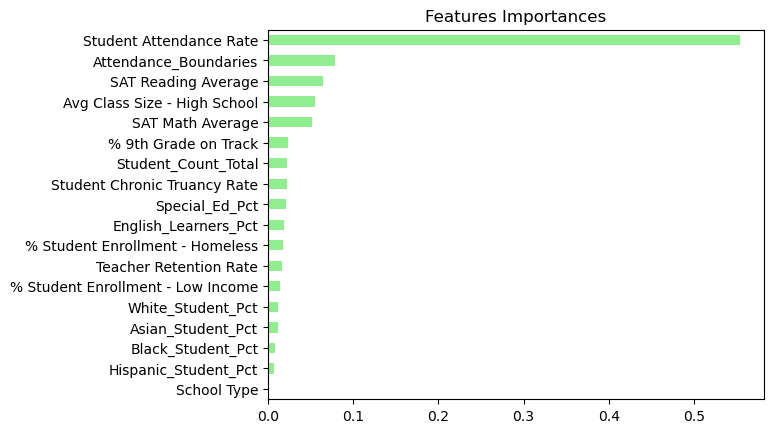

In [130]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
# Reset the index name
importances_sorted.index.name = None
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)